In [1]:
from media_impact_monitor.util.cache import get
from datetime import date, timedelta

res = get(
    "https://api.demodiff.de/entities",
    params=dict(
        size=10_000,
        start_date=(date.today() - timedelta(days=180)).strftime("%Y-%m-%d"),
    ),
).json()
print(res["total"])
data = res["data"]
for d in data:
    del d["properties"]["description"]
data[:3]


6283


[{'id': 'd21827df64ee02d94ce20ba44eaffb87593e62ae',
  'datasets': ['dd-ger-berlin'],
  'referents': [],
  'schema': 'Event',
  'properties': {'name': ['CanG jetzt (vom 29.01. bis 29.02.2024 - täglich)'],
   'startDate': ['2024-02-10T00:00:00', '2024-02-10T15:00:00'],
   'endDate': ['2024-02-10T00:00:00', '2024-02-10T18:00:00'],
   'location': ['Berlin',
    'Friedrich-Ebert-Platz 1, 10117 Berlin',
    'Heinrich-von-Gagern-Str., 10557 Berlin'],
   'locationMentioned': ['Paul-Löbe-Allee/Wilhelmstr. - Wilhelmstr. - SPD Parteizentrale - Stresemannstr. - Potsdamer Platz - Ebertstr. - Platz des 18.März - Dorotheenstr. - Wilhelmstr. - Paul-Löbe-Allee']}},
 {'id': 'dcedf5329070a68eef983c27f5d5cc2b08417edd',
  'datasets': ['dd-ger-berlin'],
  'referents': [],
  'schema': 'Event',
  'properties': {'name': ['CanG Jetzt (vom 29.01. bis 01.04.2024 - jeweils Mo., Di., Mi., Do., Fr., Sa., So.)'],
   'startDate': ['2024-02-10T00:00:00'],
   'endDate': ['2024-02-10T23:59:00'],
   'location': ['Wilhelms

In [2]:
item = get(f"https://api.demodiff.de/entities/{data[0]['id']}").json()
del item["properties"]["description"]
item


{'id': 'd21827df64ee02d94ce20ba44eaffb87593e62ae',
 'datasets': ['dd-ger-berlin'],
 'referents': [],
 'schema': 'Event',
 'properties': {'name': ['CanG jetzt (vom 29.01. bis 29.02.2024 - täglich)'],
  'startDate': ['2024-02-10T00:00:00', '2024-02-10T15:00:00'],
  'endDate': ['2024-02-10T00:00:00', '2024-02-10T18:00:00'],
  'location': ['Berlin',
   'Friedrich-Ebert-Platz 1, 10117 Berlin',
   'Heinrich-von-Gagern-Str., 10557 Berlin'],
  'locationMentioned': ['Paul-Löbe-Allee/Wilhelmstr. - Wilhelmstr. - SPD Parteizentrale - Stresemannstr. - Potsdamer Platz - Ebertstr. - Platz des 18.März - Dorotheenstr. - Wilhelmstr. - Paul-Löbe-Allee']}}

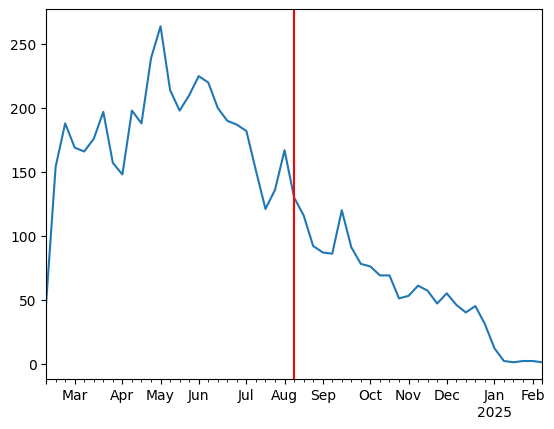

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

ds = (
    pd.Series([pd.to_datetime(d["properties"]["startDate"][0]).date() for d in data])
    .value_counts()
    .sort_index()
)
ds = ds[ds.index < date.today() + timedelta(days=180)]
ds = ds.reindex(pd.date_range(ds.index.min(), ds.index.max(), freq="D")).fillna(0)
ds_weekly = ds.resample("W").sum()
ds_weekly.plot()
plt.axvline(x=date.today(), color="r")
plt.show()
